In [1]:
import random
import string
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy.matlib as npmatlib
%matplotlib inline

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [2]:
#ens_sz = [5, 10, 20, 30, 40, 50, 100, 125, 150, 175, 200, 300, 400, 500, 1000, 5000, 10000]
ens_sz = [5, 10, 20, 30, 40, 50, 100, 125, 150, 175, 200]

posteriors = [None] * len(ens_sz)

for i in range(len(ens_sz)):
    p = np.load('sensitivity_analysis/posteriors'+str(ens_sz[i])+'.npy')
    posteriors[i] = np.where(p<0.5, 0, 1)
    print(posteriors[i].shape)
    
ref = np.squeeze(np.load('sensitivity_analysis/ref_sens.npy'))

(5, 28, 28, 1)
(10, 28, 28, 1)
(20, 28, 28, 1)
(30, 28, 28, 1)
(40, 28, 28, 1)
(50, 28, 28, 1)
(100, 28, 28, 1)
(125, 28, 28, 1)
(150, 28, 28, 1)
(175, 28, 28, 1)
(200, 28, 28, 1)


In [3]:
#color by label
my_cmap = cm.get_cmap('seismic')
my_norm = Normalize(vmin=0, vmax=len(ens_sz))
cs = my_cmap(my_norm(np.linspace(0, len(ens_sz)-1, len(ens_sz))))

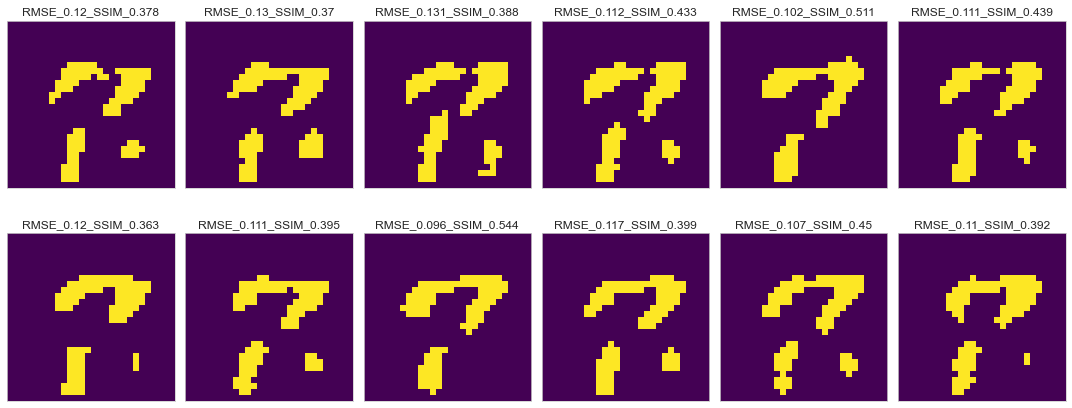

In [4]:
#view posteriors
sens = 2

f = plt.figure(figsize=(15, 12))
for i in range(12):
    plt.subplot(4, 6, i+1)
    img = posteriors[sens][i, :, :, 0]
    plt.imshow(img, cmap='viridis')
    plt.grid(False), plt.xticks([]), plt.yticks([])
    plt.title('RMSE_'+str(round(mean_squared_error(ref, img),3))+'_'+
         'SSIM_'+str(round(ssim(ref, img, data_range=img.max() - img.min()),3)))
plt.tight_layout()

In [5]:
#mean and variance of prior and posterior (LSDA) to inversion solutions from LSI
def plotmvar(data1, data2, name=[]):
    f = plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(data1), cmap="viridis", vmin=0, vmax=1, aspect='equal')
    plt.xticks([]), plt.yticks([])
    plt.title(name+"_$\mu$")

    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(data2), cmap="viridis", vmin=0, vmax=0.25)
    plt.xticks([]), plt.yticks([])
    plt.title(name+"_$\sigma$")
    plt.tight_layout()

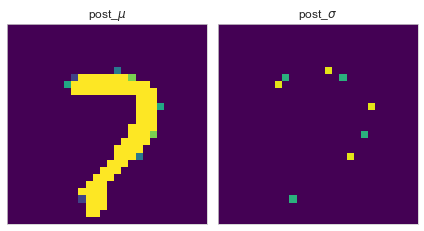

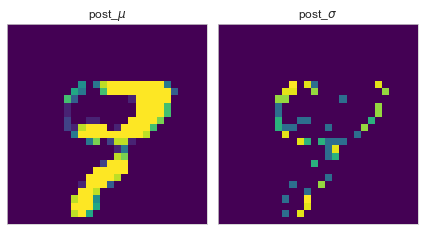

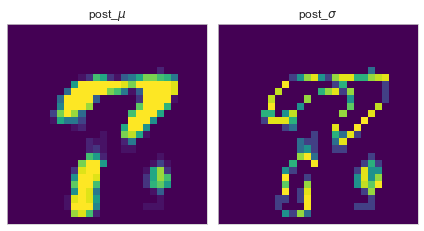

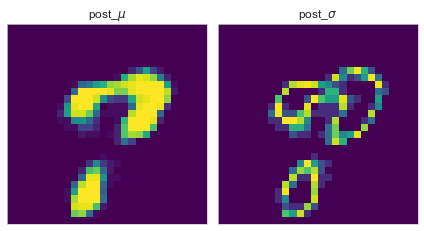

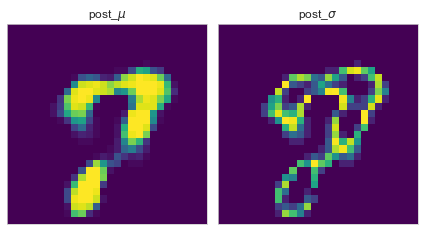

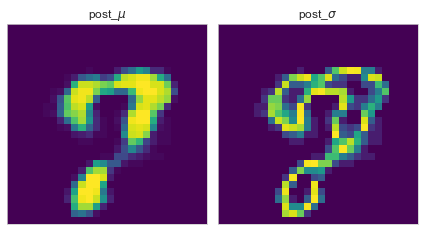

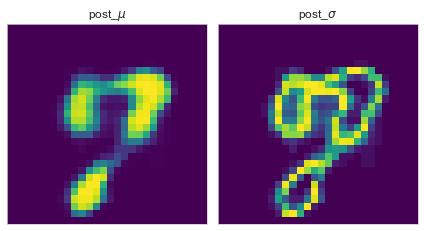

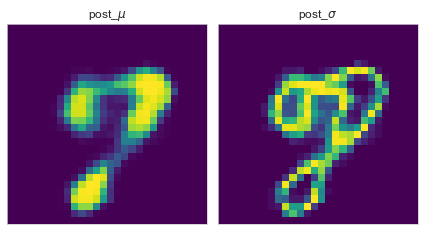

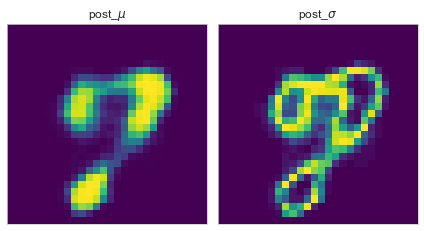

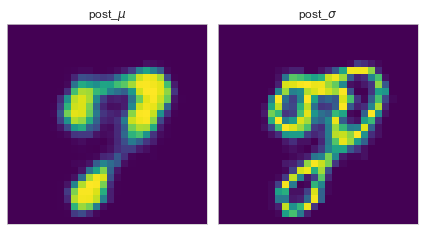

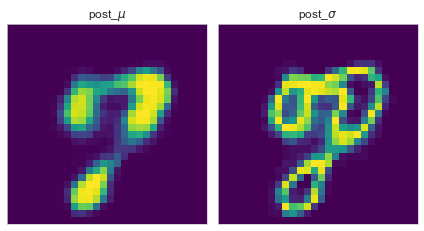

In [6]:
for i in range(len(ens_sz)):
    plotmvar(np.mean(posteriors[i], axis=0), np.var(posteriors[i], axis=0), name="post")

In [7]:
#calculate RMSE and SSIM scores
RMSE = [None] * len(ens_sz)
SSIM = [None] * len(ens_sz)

for i in range(len(ens_sz)):
    rmse_ = np.zeros(len(posteriors[i]))
    ssim_ = np.zeros(len(posteriors[i]))
    for j in range(len(posteriors[i])):
        img = posteriors[i][j, :, :, 0]
        rmse_[j] = mean_squared_error(ref, img)
        ssim_[j] = ssim(ref, img, data_range=np.max(img) - np.min(img))
    RMSE[i] = rmse_
    SSIM[i] = ssim_

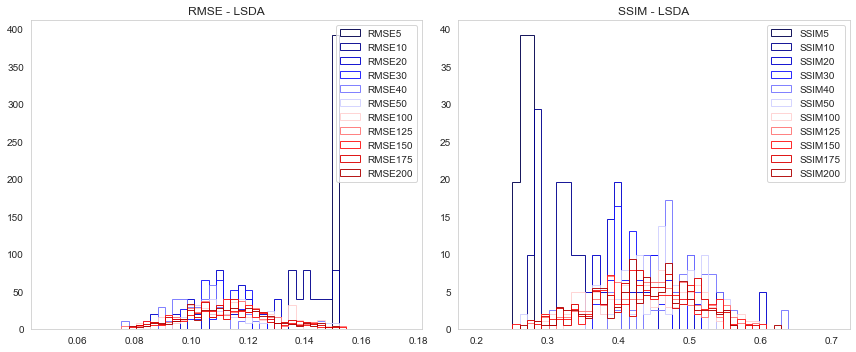

In [8]:
#compare distributions of SSIM/RMSE values from LSDA based on different ens. sizes
bbRMSE = np.linspace(0.05, 0.175, 50)
bbSSIM = np.linspace(0.2, 0.7, 50)

f = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(ens_sz)):
    plt.hist(RMSE[i].flatten(), alpha=0.9, edgecolor=cs[i], histtype='step', bins=bbRMSE, density=True, label="RMSE"+str(ens_sz[i]))
plt.grid(False)
plt.title('RMSE - LSDA')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(len(ens_sz)):
    plt.hist(SSIM[i].flatten(), alpha=0.9, edgecolor=cs[i], histtype='step', bins=bbSSIM, density=True, label="SSIM"+str(ens_sz[i]))
plt.grid(False)
plt.title('SSIM - LSDA')
plt.legend()

f.tight_layout()

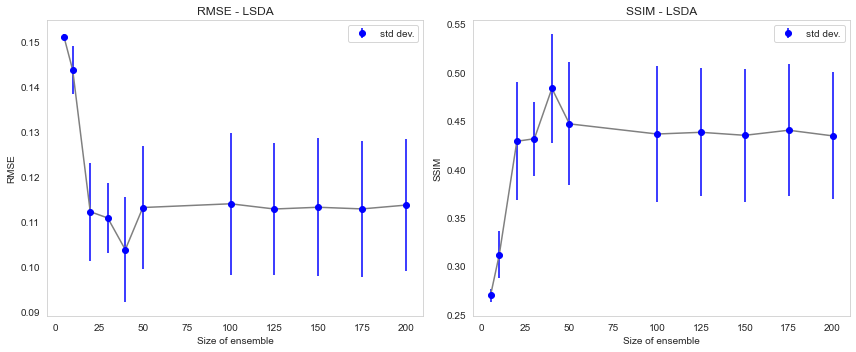

In [9]:
RMSE_m = np.zeros(len(ens_sz))
SSIM_m = np.zeros(len(ens_sz))

RMSE_std = np.zeros(len(ens_sz))
SSIM_std = np.zeros(len(ens_sz))

for i in range(len(ens_sz)):
    RMSE_m[i] = np.mean(RMSE[i])
    SSIM_m[i] = np.mean(SSIM[i])
    
    RMSE_std[i] = np.std(RMSE[i])
    SSIM_std[i] = np.std(SSIM[i]) 

f = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.errorbar(ens_sz, RMSE_m, yerr=RMSE_std, fmt='o', ecolor='blue', c='b', label="std dev.")
plt.plot(ens_sz, RMSE_m, c="gray")
plt.grid(False)
plt.title('RMSE - LSDA')
plt.xlabel('Size of ensemble')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(ens_sz, SSIM_m, yerr=SSIM_std, fmt='o', ecolor='blue', c='b', label="std dev.")
plt.plot(ens_sz, SSIM_m, c="gray")
plt.grid(False)
plt.title('SSIM - LSDA')
plt.xlabel('Size of ensemble')
plt.ylabel('SSIM')
plt.legend()

f.tight_layout()